<a href="https://colab.research.google.com/github/RemyaRS/Feature-Engineering/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries needed

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Using google drive to import dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importing dataset from google drive

Source : https://www.kaggle.com/code/spscientist/student-performance-in-exams/data

In [3]:
data = pd.read_csv("/content/drive/MyDrive/StudentsPerformance.csv", encoding='latin-1')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#Details of Dataset

In [4]:
data.shape

(1000, 8)

Shows that in th dataset:

Number of rows = 1000

Number of columns = 8

**To Find Names of Columns / Features Variables of Dataset**

In [5]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

To get important statistics data of the given dataset

In [6]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Finding Datatypes of Columns / Feature Variables

In [7]:
data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

To find number of unique values in the dataset

In [8]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

#Finding all numerical and categorical features present in the dataset 

In [9]:
from sklearn.compose import make_column_selector
        
cat_cols = make_column_selector(dtype_include=object) (data)
print ('Categorical Feature Variables are', cat_cols)
## or
num_selector = make_column_selector(dtype_include=np.number)
num_cols = num_selector (data)
print ('Numerical Feature Variables are', num_cols) 

Categorical Feature Variables are ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
Numerical Feature Variables are ['math score', 'reading score', 'writing score']


# Check whether there is any outlier using boxplot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


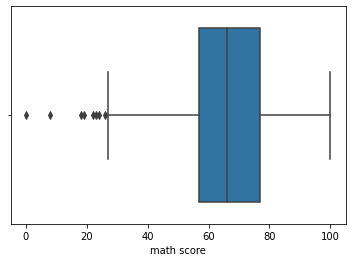

In [10]:
sns.boxplot(data['math score'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


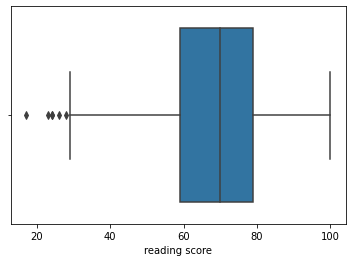

In [11]:
sns.boxplot(data['reading score'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


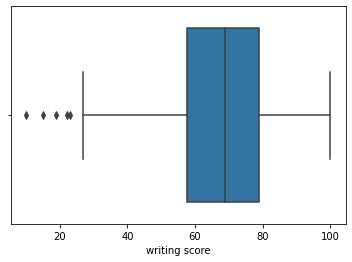

In [12]:
sns.boxplot(data['writing score'])

# Check number of missing terms in all feature variables

In [13]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#Cleaning Raw Data

In [14]:
dataset = data.drop(['race/ethnicity', 'parental level of education'], axis=1)
dataset.head()

,gender,lunch,test preparation course,math score,reading score,writing score
0,female,standard,none,72,72,74
1,female,standard,completed,69,90,88
2,female,standard,none,90,95,93
3,male,free/reduced,none,47,57,44
4,male,standard,none,76,78,75


# Relationship Analysis

To know relationhip between numerical variables in a dataset use correlation & pairplot

###Correlation matrix - Heatmap

In [15]:
cor = dataset.corr()

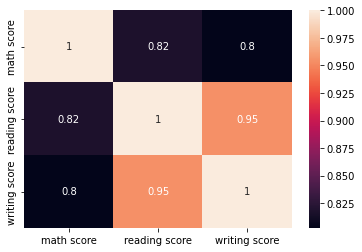

In [16]:
sns.heatmap(cor, xticklabels = cor.columns, yticklabels = cor.columns, annot=True)

###Pairplot

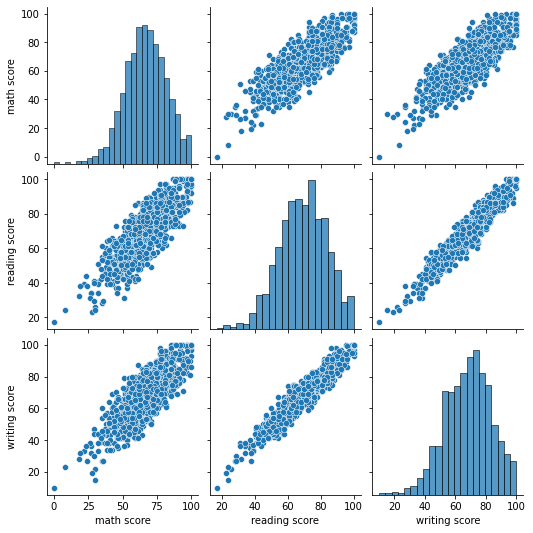

In [17]:
sns.pairplot(dataset)

### Histogram

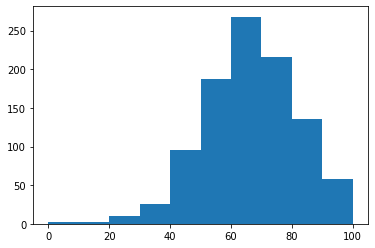

In [18]:
plt.hist(dataset['math score'])
plt.show()

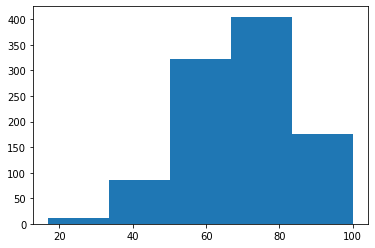

In [19]:
plt.hist(dataset['reading score'], bins = 5)
plt.show()

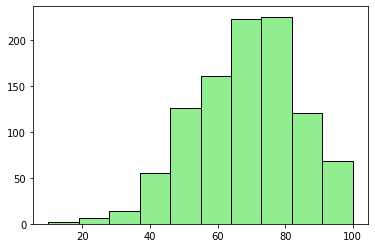

In [20]:
plt.hist(dataset['writing score'], color = "lightgreen", ec="black")
plt.show()